# Importing Libraries  #

In [2]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Importing Dataset #


In [3]:
# loading the diabetes dataset to a pandas DataFrame
wine_dataset = pd.read_csv('DataSet\winequality-red.csv') 

In [4]:
# printing the first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# number of rows and Columns in this dataset
wine_dataset.shape

(3048, 12)

In [6]:
# getting the statistical measures of the data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,8.386253,0.526509,0.274009,2.540502,0.088096,15.744094,46.742126,0.996797,3.307051,0.658570,10.413763,5.638780
std,1.742201,0.179102,0.194950,1.385718,0.047707,10.436933,33.054501,0.001888,0.154514,0.172025,1.071473,0.805563
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.390000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995660,3.200000,0.550000,9.500000,5.000000
50%,8.000000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996800,3.300000,0.620000,10.100000,6.000000
75%,9.300000,0.635000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997900,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset['quality'].value_counts()

5    1302
6    1211
7     384
4     100
8      34
3      17
Name: quality, dtype: int64

In [8]:
wine_dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.594118,0.886765,0.194118,2.535294,0.131118,11.235294,24.882353,0.997538,3.394118,0.570588,9.955882
4,7.852000,0.691450,0.175500,2.737000,0.091490,12.530000,37.410000,0.996564,3.374200,0.597800,10.267500
5,8.212519,0.577312,0.245630,2.522926,0.093276,16.834101,56.860983,0.997150,3.301705,0.621621,9.886137
6,8.430636,0.494963,0.276862,2.476796,0.085675,15.564822,41.094963,0.996676,3.313072,0.675301,10.616171
7,8.942708,0.403698,0.379609,2.743229,0.077102,13.882812,34.781250,0.996147,3.288203,0.740937,11.470095
8,8.641176,0.426471,0.396176,2.617647,0.068647,13.117647,33.852941,0.995257,3.269118,0.770000,12.138235


# Checking & Removing Outlier

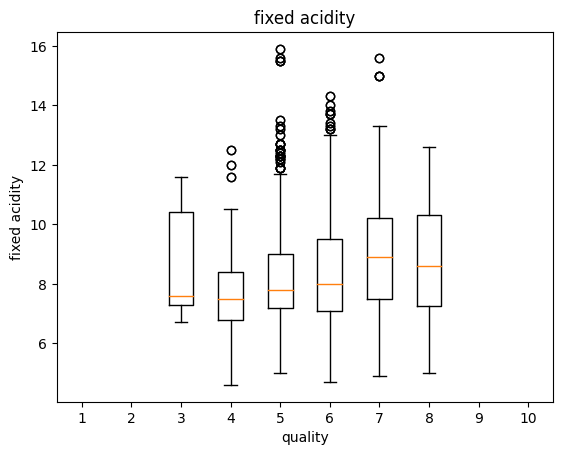

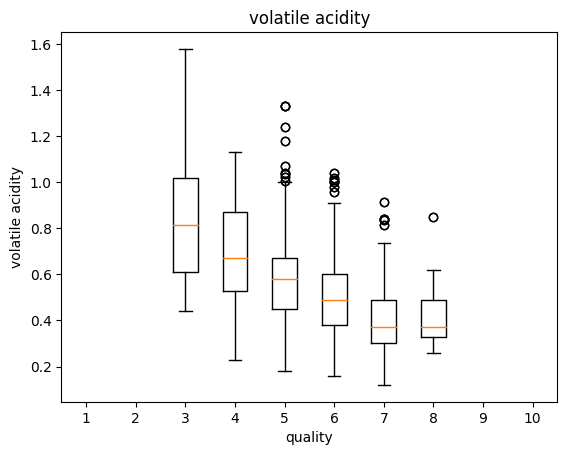

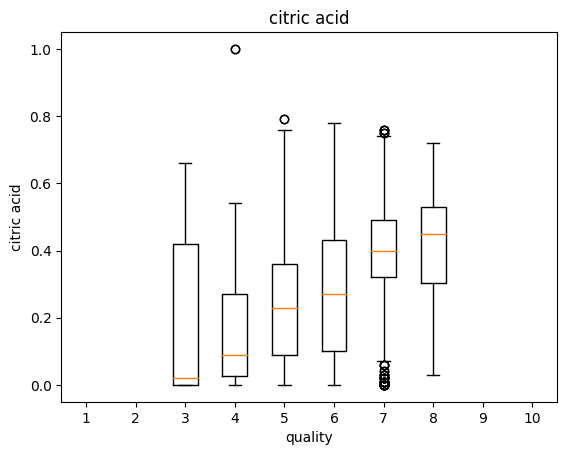

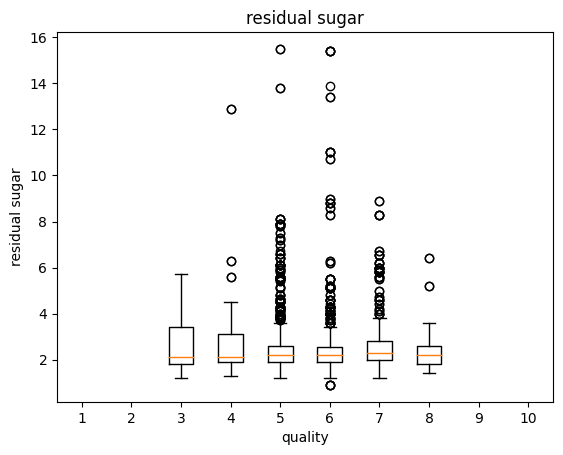

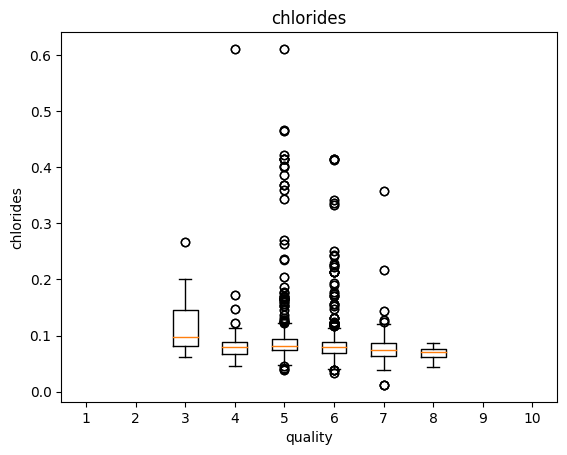

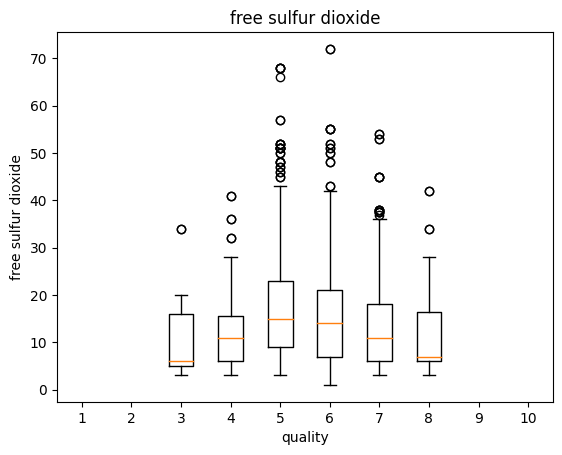

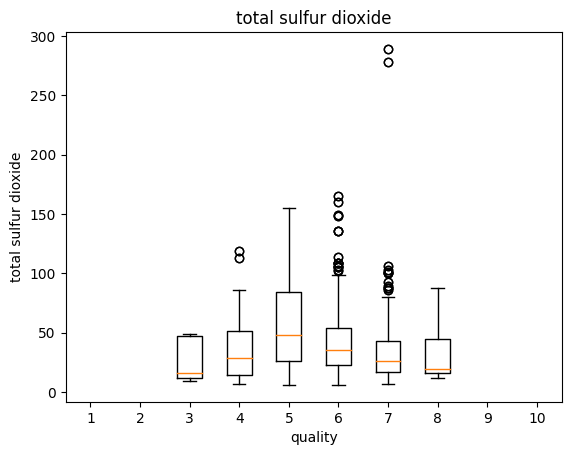

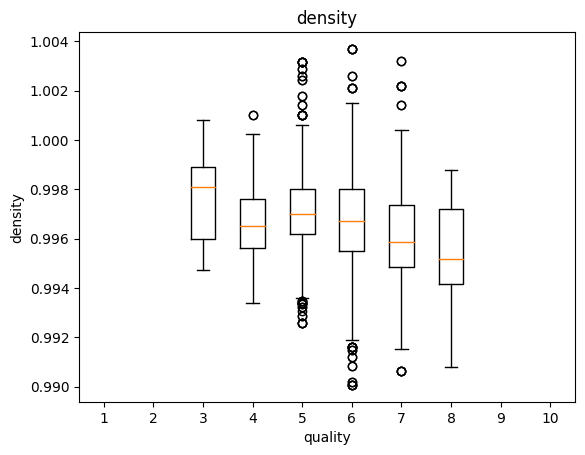

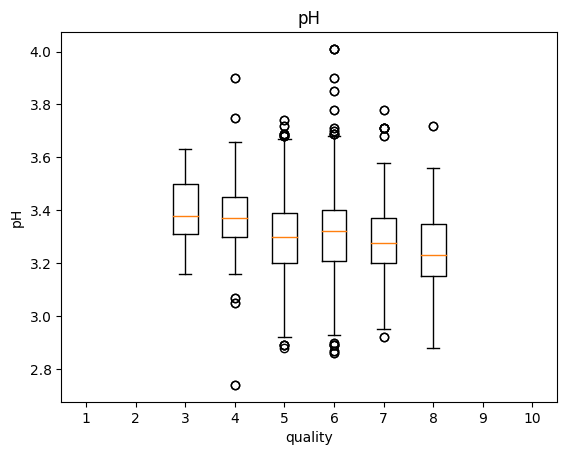

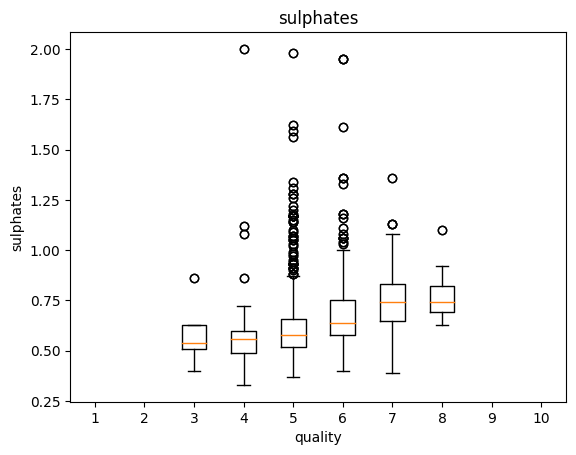

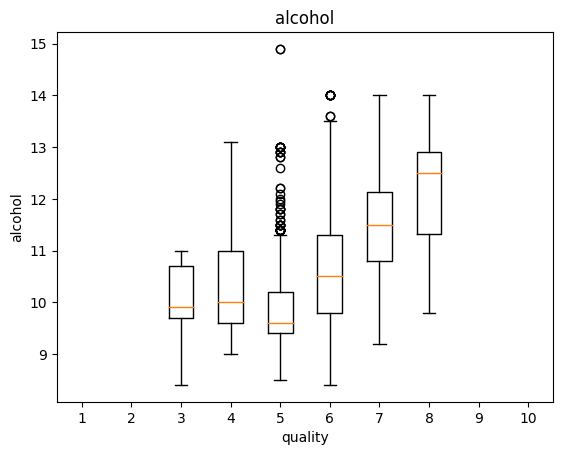

In [9]:
for label in wine_dataset.columns[:-1]:
    plt.boxplot([wine_dataset[wine_dataset['quality']==i][label]for i in range(1,11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()

In [10]:
# Calculate the IQR for each feature
Q1 = wine_dataset.quantile(0.25)
Q3 = wine_dataset.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove any data points that fall outside of the bounds for any of the features
outliers = wine_dataset[((wine_dataset < lower_bound) | (wine_dataset > upper_bound)).any(axis=1)]
wine_dataset = wine_dataset[~((wine_dataset < lower_bound) | (wine_dataset > upper_bound)).any(axis=1)]

# Create a table of the lower and upper bounds for each feature
bounds = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Print the table of bounds
print(bounds)

                      Lower Bound  Upper Bound
fixed acidity              4.0500     12.45000
volatile acidity           0.0225      1.00250
citric acid               -0.3950      0.92500
residual sugar             0.8500      3.65000
chlorides                  0.0410      0.12100
free sulfur dioxide      -14.0000     42.00000
total sulfur dioxide     -39.5000    124.50000
density                    0.9923      1.00126
pH                         2.9000      3.70000
sulphates                  0.2800      1.00000
alcohol                    7.1000     13.50000
quality                    3.5000      7.50000


In [11]:
wine_dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# separating the data and labels
X = wine_dataset.drop(columns = 'quality', axis=1)
Y = wine_dataset['quality']

In [13]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00            1.90      0.076   
1               7.8              0.88         0.00            2.60      0.098   
2               7.8              0.76         0.04            2.30      0.092   
3              11.2              0.28         0.56            1.90      0.075   
4               7.4              0.70         0.00            1.90      0.076   
...             ...               ...          ...             ...        ...   
3042            6.9              0.58         0.20            1.75      0.058   
3043            7.3              0.67         0.02            2.20      0.072   
3045            6.9              0.63         0.02            1.90      0.078   
3046            6.8              0.67         0.00            1.90      0.080   
3047            6.9              0.58         0.01            1.90      0.080   

      free sulfur dioxide  

In [14]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
3042    5
3043    6
3045    5
3046    5
3047    5
Name: quality, Length: 2261, dtype: int64


Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
print(standardized_data)

[[-0.56849052  1.09652789 -1.38571382 ...  1.40689261 -0.60699233
  -0.96899087]
 [-0.29652923  2.20278698 -1.38571382 ... -0.901622    0.41859715
  -0.55606694]
 [-0.29652923  1.46528092 -1.16338997 ... -0.45481272  0.16219978
  -0.55606694]
 ...
 [-0.90844214  0.66631602 -1.27455189 ...  0.58774227  1.01685769
  -0.55606694]
 [-0.97643246  0.91215137 -1.38571382 ...  0.58774227  0.9313919
  -0.65929792]
 [-0.90844214  0.35902182 -1.33013286 ...  0.58774227  0.8459261
  -0.65929792]]


In [19]:
X = standardized_data
Y = wine_dataset['quality']

In [20]:
print(X)
print(Y)

[[-0.56849052  1.09652789 -1.38571382 ...  1.40689261 -0.60699233
  -0.96899087]
 [-0.29652923  2.20278698 -1.38571382 ... -0.901622    0.41859715
  -0.55606694]
 [-0.29652923  1.46528092 -1.16338997 ... -0.45481272  0.16219978
  -0.55606694]
 ...
 [-0.90844214  0.66631602 -1.27455189 ...  0.58774227  1.01685769
  -0.55606694]
 [-0.97643246  0.91215137 -1.38571382 ...  0.58774227  0.9313919
  -0.65929792]
 [-0.90844214  0.35902182 -1.33013286 ...  0.58774227  0.8459261
  -0.65929792]]
0       5
1       5
2       5
3       6
4       5
       ..
3042    5
3043    6
3045    5
3046    5
3047    5
Name: quality, Length: 2261, dtype: int64


Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(2261, 11) (1808, 11) (453, 11)


In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [39]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [35]:
import pickle
import os


In [41]:
scaler_path=os.path.join('model/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Trainning Models using various algorithms #

## Support Vector Machine ##


In [23]:
classifier = svm.SVC(kernel='linear',random_state = 42)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [24]:
pred_svm = classifier.predict(X_test)
print(classification_report(Y_test, pred_svm))
cross_val = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=10)
print(cross_val.mean())

c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.65      0.73      0.69       197
           6       0.54      0.65      0.59       191
           7       0.00      0.00      0.00        53

    accuracy                           0.59       453
   macro avg       0.30      0.35      0.32       453
weighted avg       0.51      0.59      0.55       453

0.6072866789441373


## Decision Tree Classifier ##

In [25]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
pred_dt = dectree.predict(X_test)
print(classification_report(Y_test, pred_dt))
cross_val = cross_val_score(estimator=dectree, X=X_train, y=Y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           4       1.00      0.83      0.91        12
           5       0.93      0.93      0.93       197
           6       0.89      0.89      0.89       191
           7       0.85      0.89      0.87        53

    accuracy                           0.91       453
   macro avg       0.92      0.88      0.90       453
weighted avg       0.91      0.91      0.91       453

0.8866175567833027


## Logistic Regression ##

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [28]:
pred_logreg = logreg.predict(X_test)
print(classification_report(Y_test, pred_logreg))
cross_val = cross_val_score(estimator=logreg, X=X_train, y=Y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.68      0.72      0.70       197
           6       0.60      0.65      0.63       191
           7       0.75      0.51      0.61        53

    accuracy                           0.65       453
   macro avg       0.51      0.47      0.48       453
weighted avg       0.64      0.65      0.64       453

0.6354880294659301


c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Random Forest Classifier ##

In [29]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [30]:
pred_ranfor = ranfor.predict(X_test)
print(classification_report(Y_test, pred_ranfor))
cross_val = cross_val_score(estimator=ranfor, X=X_train, y=Y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           4       1.00      0.83      0.91        12
           5       0.94      0.96      0.95       197
           6       0.93      0.93      0.93       191
           7       0.96      0.89      0.92        53

    accuracy                           0.94       453
   macro avg       0.96      0.90      0.93       453
weighted avg       0.94      0.94      0.94       453

0.9098496009821977


In [43]:
import joblib
model_path=os.path.join('model/ranfor.sav')
joblib.dump(ranfor,model_path)

['model/ranfor.sav']

# Making Predictions based on various trained models #

In [31]:
X_test_prediction_svc = classifier.predict(X_test)
X_test_prediction_dtc = dectree.predict(X_test)
X_test_prediction_lr = logreg.predict(X_test)
X_test_prediction_rfc = ranfor.predict(X_test)

## Calculating the accuracy of the predictions ##

In [32]:
accuracy_svc = accuracy_score(X_test_prediction_svc, Y_test)
accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)
accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)

In [33]:
print("Logistic Regression: " + str(accuracy_lr * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dtc * 100))
print("Random Forest: " + str(accuracy_rfc * 100))

Logistic Regression: 64.90066225165563
Support Vector Classifier: 59.38189845474614
Decision tree: 90.50772626931567
Random Forest: 93.59823399558499


## Random Forest gives the best accuracy ##

## Making a input system ##

In [34]:
input_data = (8.5, 0.28, 0.56, 1.8, 0.092, 35.0, 103.0, 0.9969, 3.30, 0.75, 11.0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
warnings.filterwarnings('ignore')

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Good quality wine')
else:
  print('Bad quality wine')

[[ 0.17940304 -1.48474334  1.72682017 -0.87478919  0.90051314  2.30350214
   2.29019766  0.15893566 -0.15693987  1.01685769  0.68270486]]
[6]
Bad quality wine
